In [22]:
#동적 생성되는 data 크롤링
#Selenium 모듈 사용
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import selenium
from selenium import webdriver

### 관련 메서드
- get(url) : url에 문서를 요청하고 응답을 받는 메서드
    
#### 페이지 단일 element에 접근하는 메서드
- find_element_by_name('html_name')
- find_element_by_id('html_id')
- find_element_by_xpath('패스경로') : 스크립트 실행 경로를 찾아 접근
    
    
#### 페이지의 여러 element에 접근하는 메서드
- find_element_by_class_selector('html slelctor')
- find_element_by_class_name('html_class')
- find_element_by_tag_name('html tag')

#### Webdriver 객체 생성
- driver = webdriver.Chrome(드라이버경로)

#### 접근한 페이지 source 추출
- html=driver.page_source

In [23]:
# 크롬 드라이버를 통한 네이버 접속

driver = webdriver.Chrome("./driver/chromedriver")
driver.get("https://news.naver.com")


'<html lang="ko" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"><head>\n<meta charset="euc-kr">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="referrer" contents="always">\n<meta http-equiv="refresh" content="600">\n<meta name="viewport" content="width=1106">\n\n    \n    \n        \n            \n            \n            \n            \n            \n        \n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n    \n\n<meta property="og:title" content="네이버 뉴스">\n<meta property="og:type" content="website">\n<meta property="og:url" content="http://news.naver.com/main/home.naver">\n<meta property="og:image" content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png">\n<meta property="og:description" content="정치, 경제, 사회, 생활/문화, 세계, IT/과학 등 언론사별, 분야별 뉴스 기사 제공">\n<meta property="og:article:author" content="
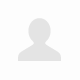
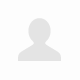

In [24]:
driver.page_source # 전체 페이지 소스 로딩

In [25]:

like_list = driver.find_elements_by_css_selector("span.u_likeit_text._count.num")
like_num = [like.text for like in like_list ]
like_num

[]

In [26]:
#articleTitleCommentCount > span.lo_txt

In [27]:
rep_list = driver.find_elements_by_css_selector("span.lo_txt")
rep_num = [rep.text for rep in rep_list ]
rep_num

[]

In [28]:
# 전달된 뉴스  url의 기사에서 기사제목 기사입력시간을 반환하는 함수
def get_news_sub_info(url) :
    
    #1.전달된 url에 접속 후 응답객체 반환
    headers ={"User-Agent" : 
          "Mozilla/5.0(Window NT 10.0;Win64;x64) AppleWebKit/537.36 (KHTML,likeGecko) Chrome/87.0.4280.88 Safari/537.36"}
    result = requests.get(url,headers=headers)
    
    #2.bs4 객체 생성
    bs_obj=BeautifulSoup(result.content,"html.parser")
    
    #3.필요 데이터 추출
    # 기사 제목 추출(태그객체)
    title =bs_obj.find(id='articleTitle')
    # 기사 입력시간 추출(태그객체)
    date_time = bs_obj.find("span",{"class":"t11"})
    
    #4.  webdriver  이용해서 좋아요 수를 반환
#     driver = webdriver.Chrome("./driver/chromedriver")
    time.sleep(2)
    driver.get(url)
    driver.page_source
    # 좋아요 수
    like_list = driver.find_elements_by_css_selector("span.u_likeit_text._count.num")
    like_num = [like.text for like in like_list ]
    print(like_num)
    #댓글 수
    rep_list = driver.find_elements_by_css_selector("span.lo_txt")
    rep_num = [rep.text for rep in rep_list ]
    print(rep_num)
    
    #5.수집 데이터 dict로 구성 후 반환
    dict_sub ={}
    dict_sub["기사제목"] = title.text
    dict_sub["기사 입력 시간"]=date_time.text
    dict_sub['좋아요 수'] = like_num
    dict_sub['댓글 수'] =  rep_num
    
    return dict_sub 

In [29]:
url = "https://news.naver.com"
headers={"User-Agent":
             "Mozilla/5.0(Window NT 10.0;Win64;x64) AppleWebKit/537.36 (KHTML,likeGecko) Chrome/87.0.4280.88 Safari/537.36"}
result = requests.get(url,headers=headers)

bs_obj = BeautifulSoup(result.content,"html.parser")

#ul 태그 추출 : class:hdline_article_list
news_list = bs_obj.find("ul",{"class":"hdline_article_list"})
#모든 li 추출
lis = news_list.findAll("li")

#헤드라인뉴스 link 저장 - list
link_list=[]
for li in lis :
    a_tag = li.find("a")
    link_list.append("https://news.naver.com/"+a_tag["href"])
print(link_list)

driver = webdriver.Chrome("./driver/chromedriver")
import time
for number in range(len(link_list)) :
    res = get_news_sub_info(link_list[number])
    print(res)
    time.sleep(2)

['https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=082&aid=0001112086', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=104&oid=028&aid=0002555915', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=055&aid=0000913415', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=008&aid=0004628367', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=001&aid=0012587683']
['12']
['']
{'기사제목': '오후 8시부터 18∼49세 사전예약… 방법 & 주의사항', '기사 입력 시간': '2021.08.09. 오전 10:02', '좋아요 수': ['12'], '댓글 수': ['']}
['3']
['6']
{'기사제목': '스가 지지율 20%대 ‘위험수위’…올림픽 효과 없었다', '기사 입력 시간': '2021.08.09. 오후 1:50', '좋아요 수': ['3'], '댓글 수': ['6']}
['151']
['151']
{'기사제목': '전두환 광주지법 도착…부축받으며 항소심 법정 출석', '기사 입력 시간': '2021.08.09. 오후 12:47', '좋아요 수': ['151'], '댓글 수': ['151']}
[]
['']
{'기사제목': '9월부터 4단계에도 학교 간다', '기사 입력 시간': '2021.08.09. 오후 2:30', '좋아요 수': [], '댓글 수': ['']}
['36']
['22']
{'기사제목': "'작년 광복절 집회' 주도 전광훈 목사 집시법 위반 기소", '기사 입력 시간': '

In [30]:
for number in range(len(link_list)) :
    res = get_news_sub_info(link_list[number])
    print(res)

['12']
['2']
{'기사제목': '오후 8시부터 18∼49세 사전예약… 방법 & 주의사항', '기사 입력 시간': '2021.08.09. 오전 10:02', '좋아요 수': ['12'], '댓글 수': ['2']}
['3']
['6']
{'기사제목': '스가 지지율 20%대 ‘위험수위’…올림픽 효과 없었다', '기사 입력 시간': '2021.08.09. 오후 1:50', '좋아요 수': ['3'], '댓글 수': ['6']}
['151']
['151']
{'기사제목': '전두환 광주지법 도착…부축받으며 항소심 법정 출석', '기사 입력 시간': '2021.08.09. 오후 12:47', '좋아요 수': ['151'], '댓글 수': ['151']}
['12']
['2']
{'기사제목': '9월부터 4단계에도 학교 간다', '기사 입력 시간': '2021.08.09. 오후 2:30', '좋아요 수': ['12'], '댓글 수': ['2']}
['36']
['']
{'기사제목': "'작년 광복절 집회' 주도 전광훈 목사 집시법 위반 기소", '기사 입력 시간': '2021.08.09. 오전 11:21', '좋아요 수': ['36'], '댓글 수': ['']}
